# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений
Выполнили студенты гр. 9382 Павлов Роман и Поплавский Иван.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Основные теоретические положения

Дискретный сигнал $\displaystyle x_0, \dots, x_{N-1}$, как правило, получается при дискретизации аналогового (определённого во все моменты времени) сигнала $\displaystyle s(t)$

Дискретное преобразование Фурье. Так как $\displaystyle s(t)$ переодическая функция, то её можно разложить в ряд Фурье, коэффициенты которого вычисляются по формуле:

$$\displaystyle X(n)=\dfrac{1}{NT}\int_0^{NT}s(t)\cdot e^{-i\omega_nt}\mathrm{d}x \\ X(n) = \sum_{k=0}^{N-1}x_ke^{-i\frac{2\pi nk}{N}} , где  \displaystyle n = 0,1,\dots,N-1$$

Линейное преобразование по 5 точкам: $H_5 (\omega) = \frac15 (1 + 2\cos\omega + 2\cos{2\omega})$

Линейное преобразование по 9 точкам: $H_9(\omega) = \frac15 (1 + 2\cos\omega + 2\cos{2\omega} + 2\cos{3\omega} + 2\cos{4\omega})$

Преобразование полинома 2-ой степени по 5 точкам: $H_5(\omega) = \frac1{35}(17 + 24\cos\omega - 6\cos{2\omega})$

Преобразование полинома 2-ой степени по 9 точкам: $H_9(\omega) = \frac1{231}(59 + 108\cos\omega + 78\cos{2\omega} + 28\cos{3\omega} - 42\cos{4\omega})$

Преобразование полинома 4-ой степени по 7 точкам: $H_7(\omega) = \frac1{231}(131 + 150\cos\omega - 60\cos{2\omega} + 10\cos{3\omega})$

Преобразование полинома 4-ой степени по 11 точкам: $H_{11}(\omega) = \frac1{429}(143 + 240\cos\omega + 120\cos{2\omega} - 20\cos{2\omega} - 90\cos{4\omega} + 36\cos{5\omega})$

## Выполнение работы

1. Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k cos(\omega_kt+\varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от $0$ до $\pi$, изменяющимися с шагом $\Delta\omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от $1$ до $11$, определяемые случайным образом с помощью датчика равномерно распределённых случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от $0$ до $0.5$. Дискретная последовательность должна включать в себя $32$ отсчёта ($N=31$).

In [55]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
np.random.seed(14)

In [56]:
def analog_signal(n):
    x = np.linspace(0, n, 1024)
    omegas = np.arange(0, np.pi + 0.1 * np.pi, 0.1 * np.pi)
    A_coeffs = np.random.randint(1, 11, 11)
    phases = np.random.uniform(0, 0.5, 11)

    signal = []
    for i in x:
        signal_tmp = 0
        for omega, A, phase in zip(omegas, A_coeffs, phases):
            signal_tmp += A * np.cos(omega * i + phase)
        signal_tmp = signal_tmp / np.sum(A_coeffs)
        signal.append(signal_tmp)

    return x, signal

def discrete_signal(signal):
    x = np.linspace(0, 32, 32)
    d_signal = [signal[i * 32] for i in range(32)]
    return x, np.array(d_signal)

2. Визуализируем сгенерированные аналоговый и дискретный сигналы на промежутке $k \in [0;31]$

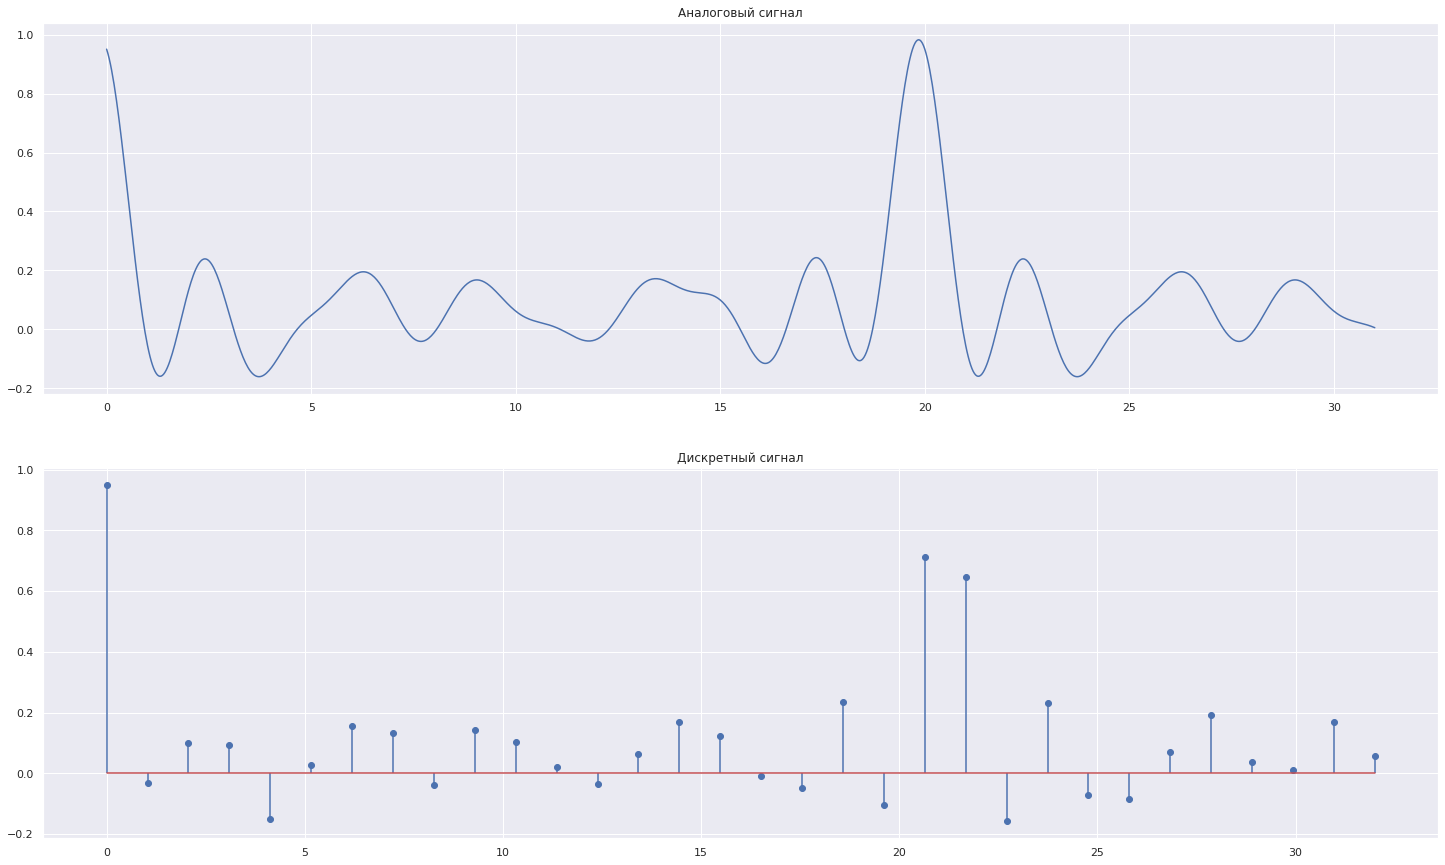

In [57]:
fig, axs = plt.subplots(2, figsize=(25,15))

x_an, analog_sig = analog_signal(31)
x_dis, d_signal = discrete_signal(analog_sig)

axs[0].plot(x_an, analog_sig)
axs[1].stem(x_dis, d_signal, use_line_collection=True)
axs[0].set_title('Аналоговый сигнал')
axs[1].set_title('Дискретный сигнал')
plt.show()

3. С помощью ДПФ найдем дискретные отсчеты спектра дискретного сигнала и визуализируем их. Рассмотрим фрагмент последовательности $\{x_k\}$ из отсчётов $N = 20$. Получим дискретную функцию с периодом $NT$, где $T$ - период дискретизации:

$$s(t) = \sum\limits_{k = -\infty}^{+\infty} x_k \delta(t - kT)$$

Спектр $s(t)$ также должен быть периодическим (с периодом ${{2\pi} \over T}$) и дискретным расстоянием между гармониками ${{2\pi} \over {NT}}$.

$s(t)$ - периодическая функция, следовательно, мы можем разложить ее в ряд Фурье с помощью ДПФ.

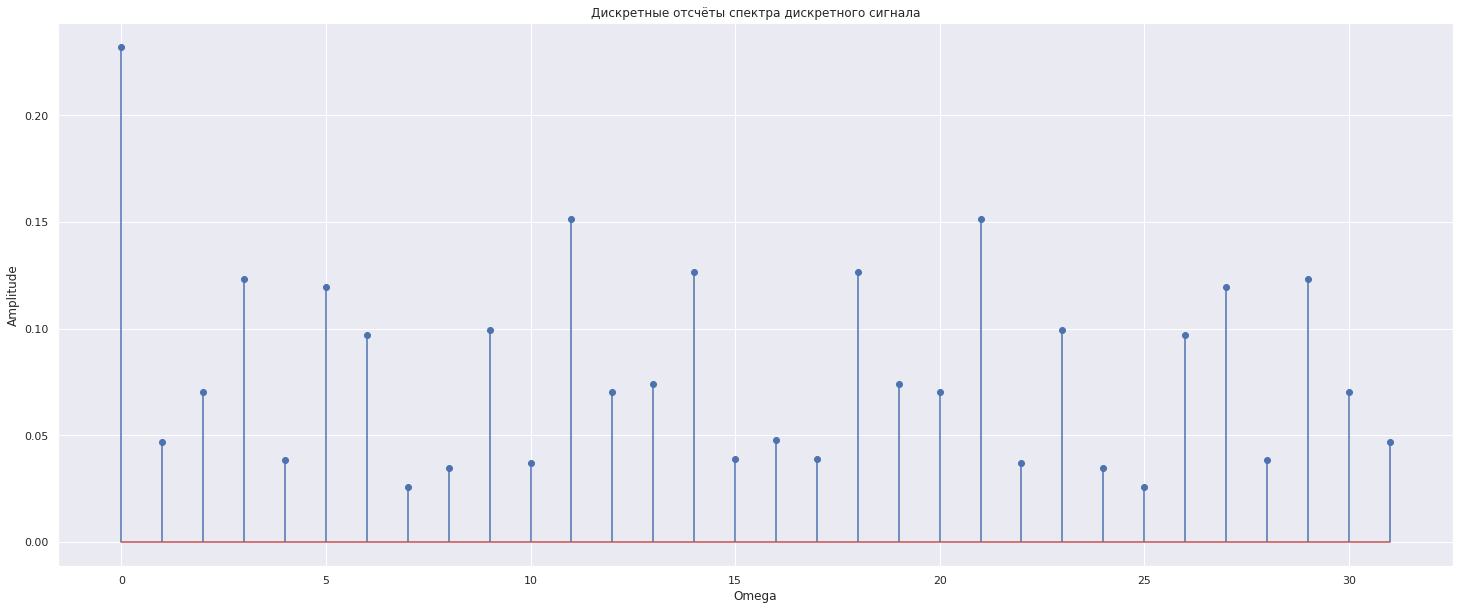

In [58]:
from scipy.fftpack import fft
plt.figure(figsize=(25, 10))
plt.stem(2*np.abs(fft(d_signal))/32, use_line_collection=True)
plt.ylabel(r'Amplitude')
plt.xlabel('Omega')
plt.title('Дискретные отсчёты спектра дискретного сигнала')
plt.show()

4. Создадим функции сглаживания: линейную для любого количества точкем, для полинома 2 степени по 5 и 9 точкам, для полинома 4 степени по 7 и 11 точкам, применим линейное сглаживание к дискретному сигналу по 5 и 9 точкам. Все функции указаны в основных теоретичиских положениях.

In [59]:
linear_smoothing = lambda y, points: np.convolve(y, np.ones(points), 'same') / points

5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

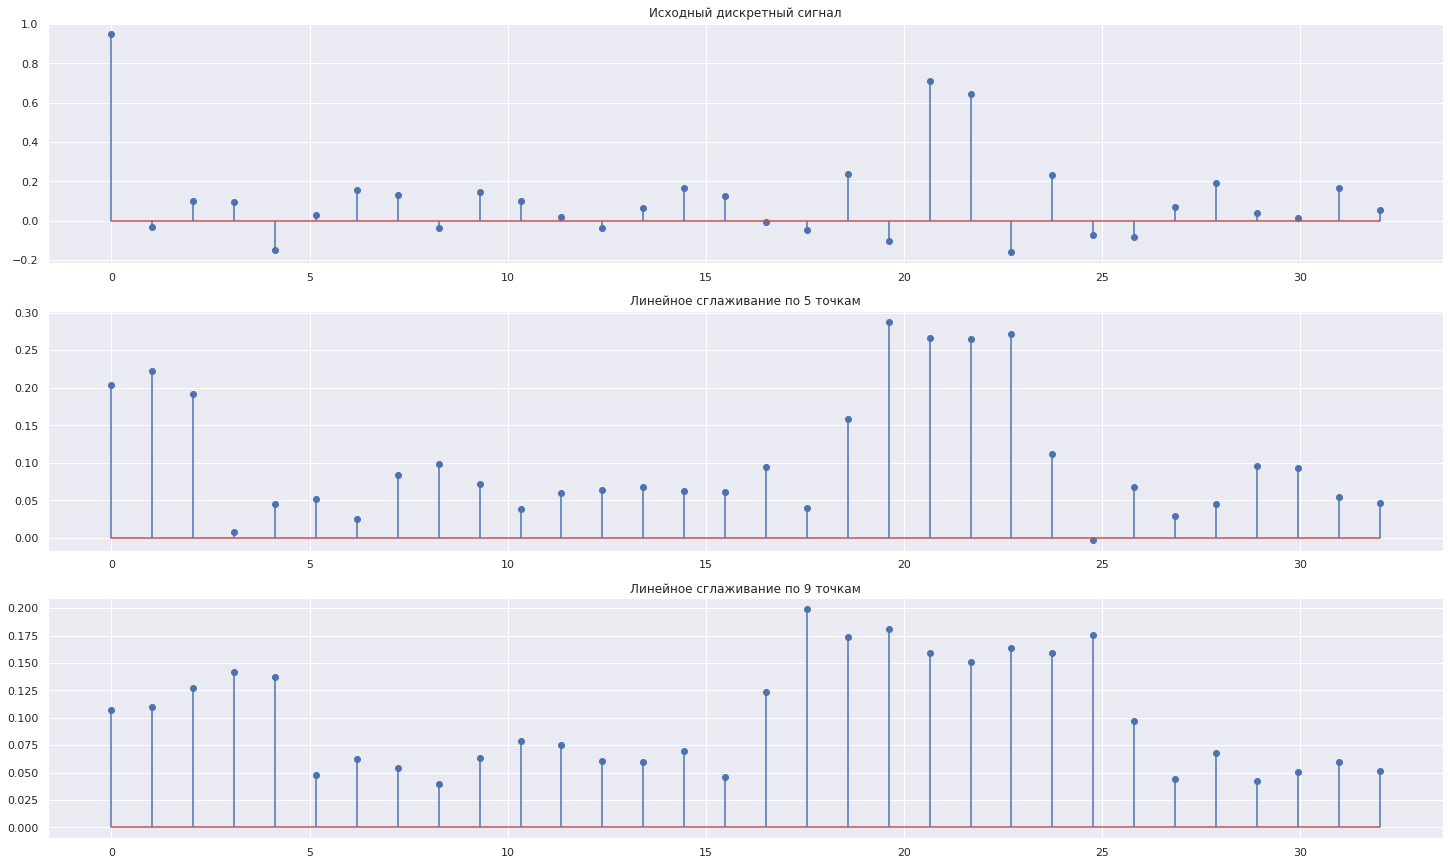

In [60]:
fig, axs = plt.subplots(3, figsize=(25,15))

axs[0].stem(x_dis, d_signal, use_line_collection=True)
axs[1].stem(x_dis, linear_smoothing(d_signal, 5), use_line_collection=True)
axs[2].stem(x_dis, linear_smoothing(d_signal, 9), use_line_collection=True)
axs[0].set_title('Исходный дискретный сигнал')
axs[1].set_title('Линейное сглаживание по 5 точкам')
axs[2].set_title('Линейное сглаживание по 9 точкам')
plt.show()

6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

In [61]:
specrt = 2*np.abs(fft(d_signal)) / len(d_signal)

specrt_5 = 2*np.abs(fft(linear_smoothing(d_signal, 5))) / len(d_signal)

specrt_9 = 2*np.abs(fft(linear_smoothing(d_signal, 9))) / len(d_signal)

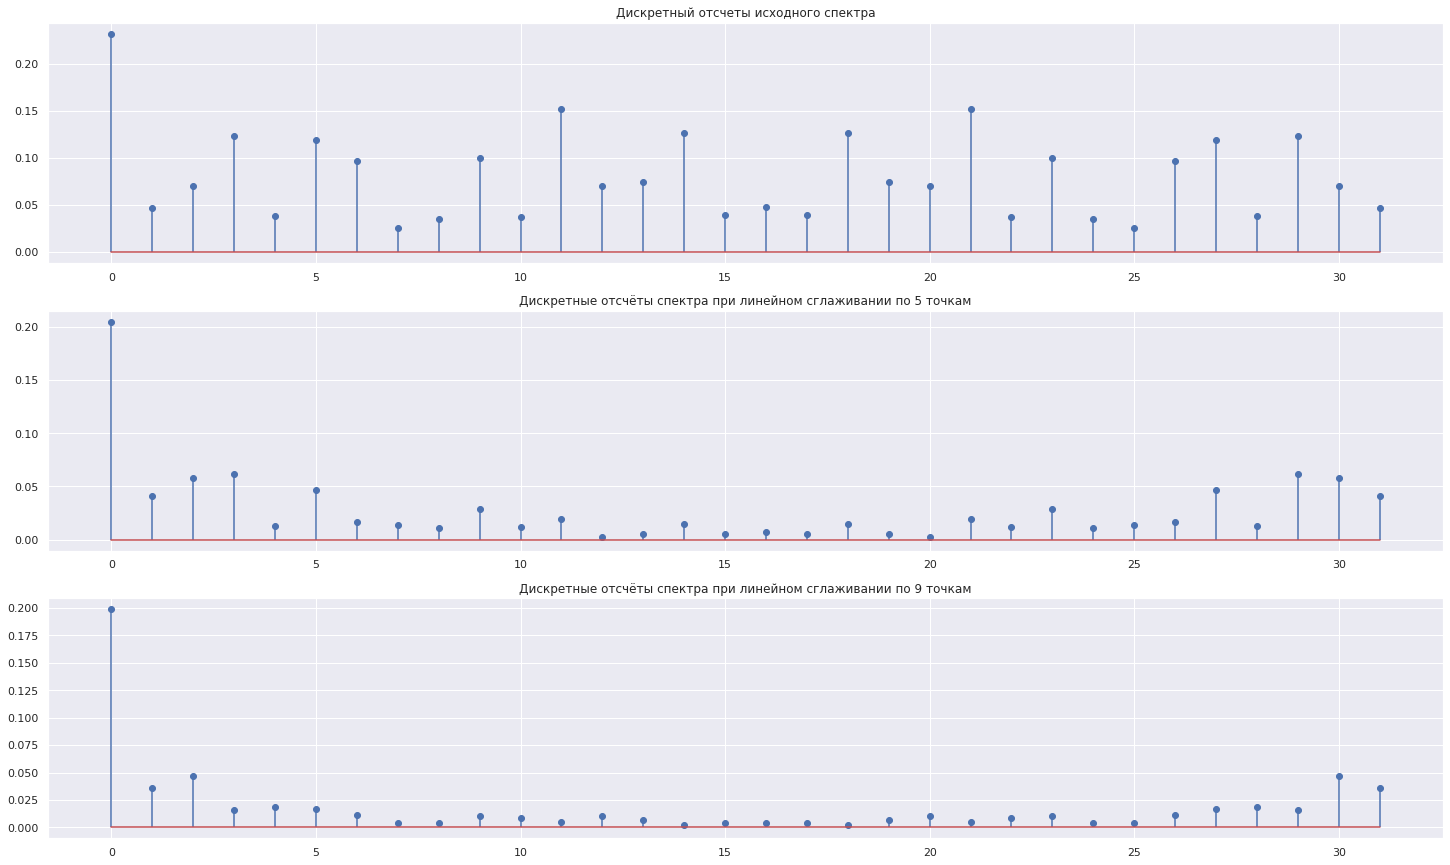

In [62]:
fig, axs = plt.subplots(3, figsize=(25,15))

axs[0].stem(specrt, use_line_collection=True)
axs[1].stem(specrt_5, use_line_collection=True)
axs[2].stem(specrt_9, use_line_collection=True)
axs[0].set_title('Дискретный отсчеты исходного спектра')
axs[1].set_title('Дискретные отсчёты спектра при линейном сглаживании по 5 точкам')
axs[2].set_title('Дискретные отсчёты спектра при линейном сглаживании по 9 точкам')
plt.show()

7. Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

In [63]:
t = np.linspace(0.001, np.pi, 500)
h5 = lambda x: (np.sin(5*np.pi*x))/(5*np.sin(np.pi*x))
h9 = lambda x: (np.sin(9*np.pi*x))/(9*np.sin(np.pi*x))

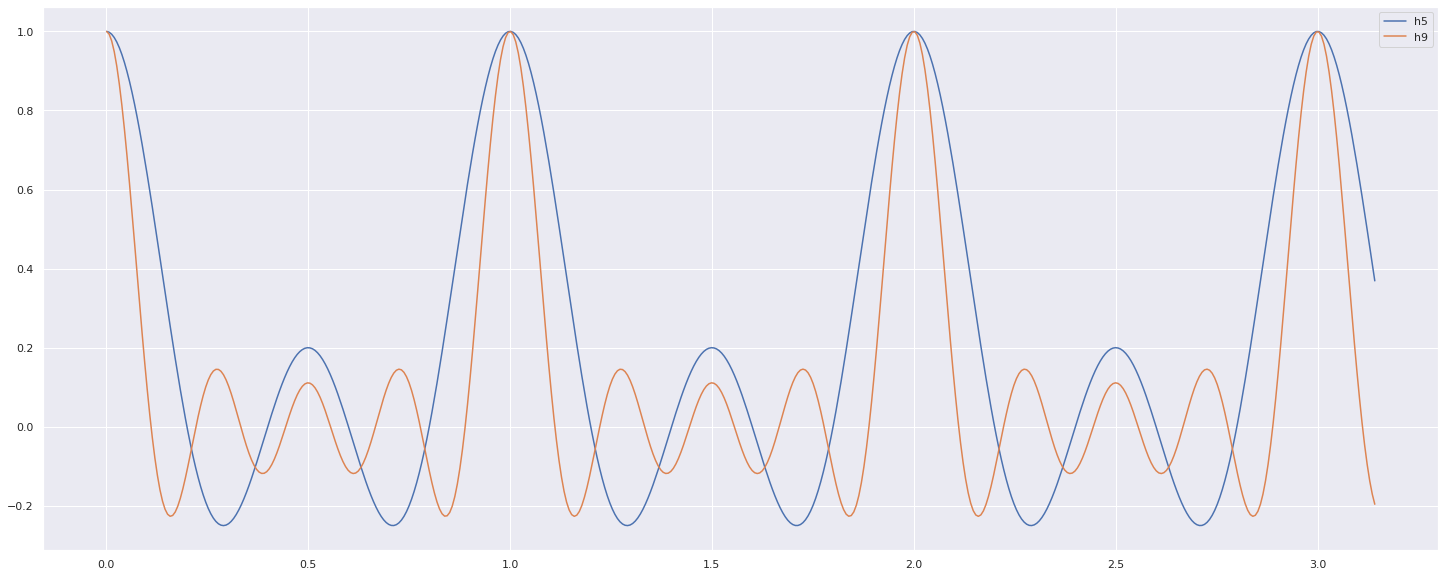

In [64]:
plt.figure(figsize=(25, 10))

plt.plot(t, h5(t), label="h5")
plt.plot(t, h9(t), label="h9")
plt.legend()

На графиках видно сопостовление непрерывной во времени бесконечной функции $\displaystyle y_n$ другую, непрерывную по частоте, бесконечную функцию, а именно спектр $\displaystyle X(n)$. Можно заметить, что амплитуда гармоник высоких частот снижена в спектре сглаженного сигнала.

8. Повторить п. 4–7 для следующих фильтров:

    a. Сглаживание полиномом 2-ой степени по 5 и 9 узлам.
    b. Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

In [65]:
pol_2_smooth_5 = lambda y: np.convolve(y, np.array([-3, 12, 17, 12, -3]), 'same') / 35
pol_4_smooth_7 = lambda y: np.convolve(y, np.array([5, -30, 75, 131, 75, -30, 5]), 'same') / 231
pol_2_smooth_9 = lambda y: np.convolve(y, np.array([-21, 14, 39, 54, 59, 54, 39, 14,-21]), 'same') / 231
pol_4_smooth_11 = lambda y: np.convolve(y, np.array([18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]), 'same') / 429

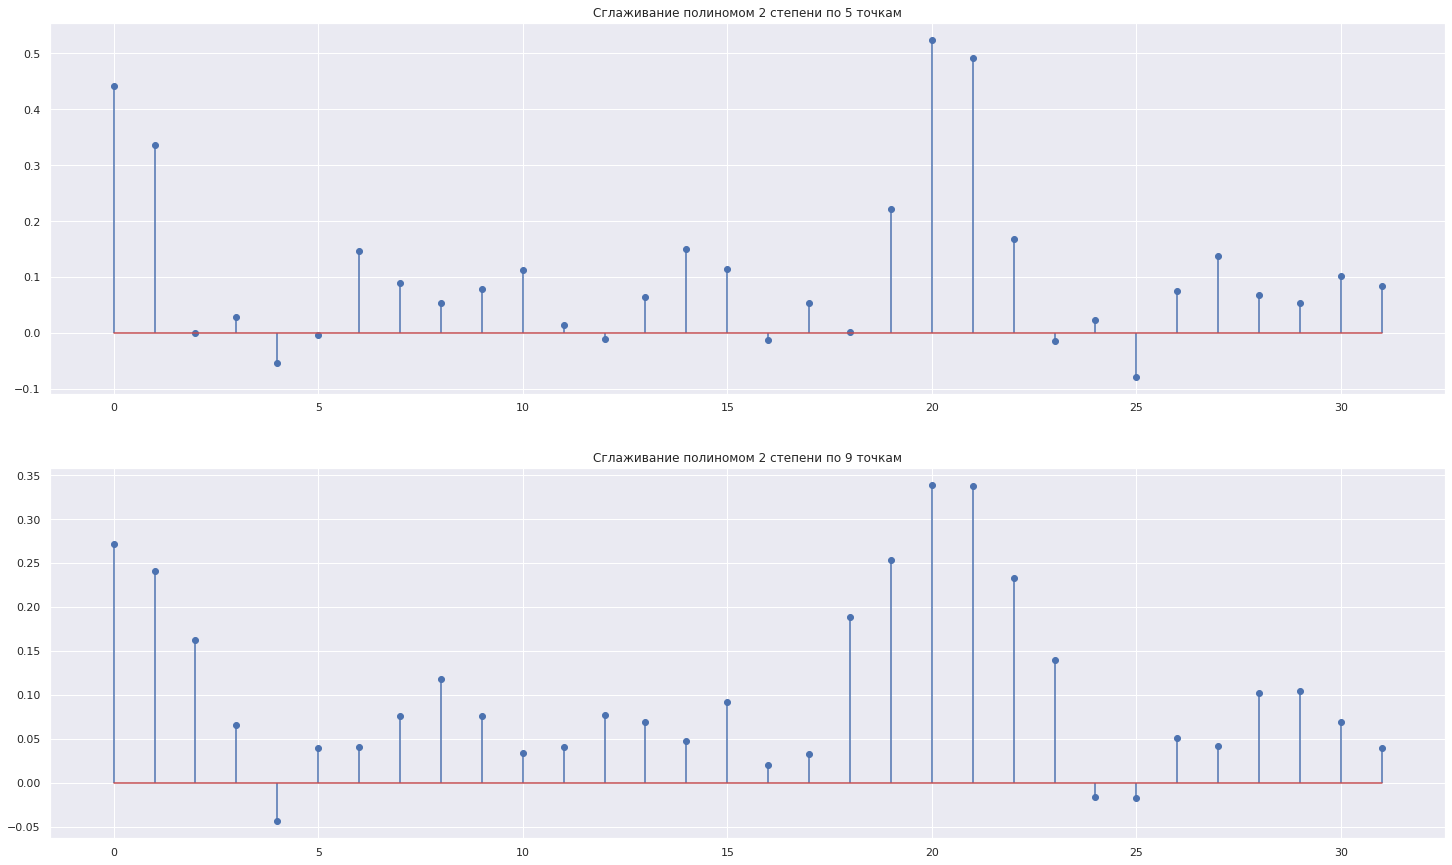

In [66]:
fig, axs = plt.subplots(2, figsize=(25,15))

axs[0].stem(pol_2_smooth_5(d_signal), use_line_collection=True)
axs[1].stem(pol_2_smooth_9(d_signal), use_line_collection=True)
axs[0].set_title('Сглаживание полиномом 2 степени по 5 точкам')
axs[1].set_title('Сглаживание полиномом 2 степени по 9 точкам')
plt.show()

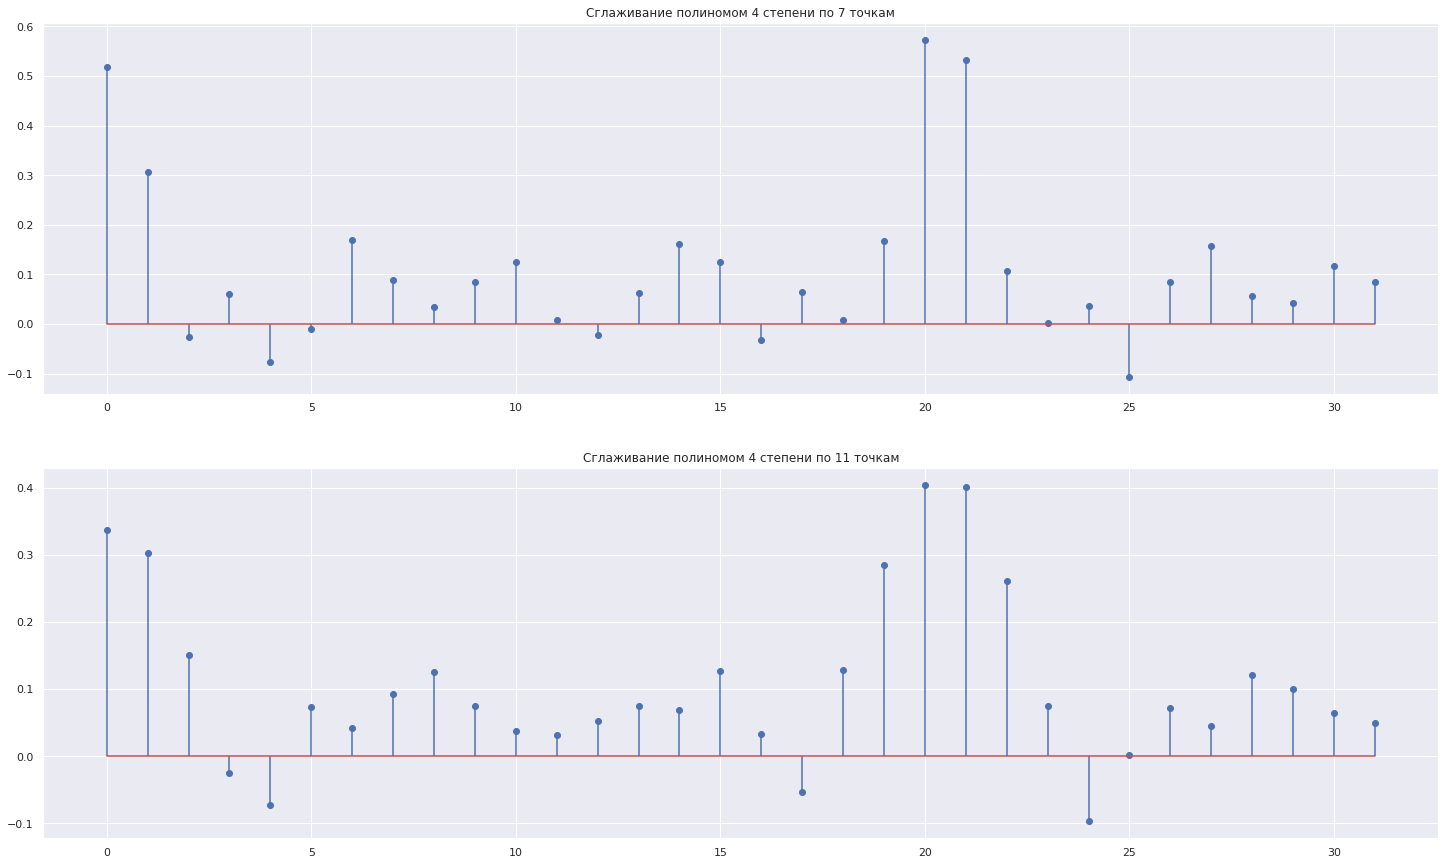

In [67]:
fig, axs = plt.subplots(2, figsize=(25,15))

axs[0].stem(pol_4_smooth_7(d_signal), use_line_collection=True)
axs[1].stem(pol_4_smooth_11(d_signal), use_line_collection=True)
axs[0].set_title('Сглаживание полиномом 4 степени по 7 точкам')
axs[1].set_title('Сглаживание полиномом 4 степени по 11 точкам')
plt.show()

In [68]:
specrt_pol2_5 = 2*np.abs(fft(pol_2_smooth_5(d_signal))) / len(d_signal)
specrt_pol2_9 = 2*np.abs(fft(pol_2_smooth_9(d_signal))) / len(d_signal)
specrt_pol4_7 = 2*np.abs(fft(pol_4_smooth_7(d_signal))) / len(d_signal)
specrt_pol4_11 = 2*np.abs(fft(pol_4_smooth_11(d_signal))) / len(d_signal)

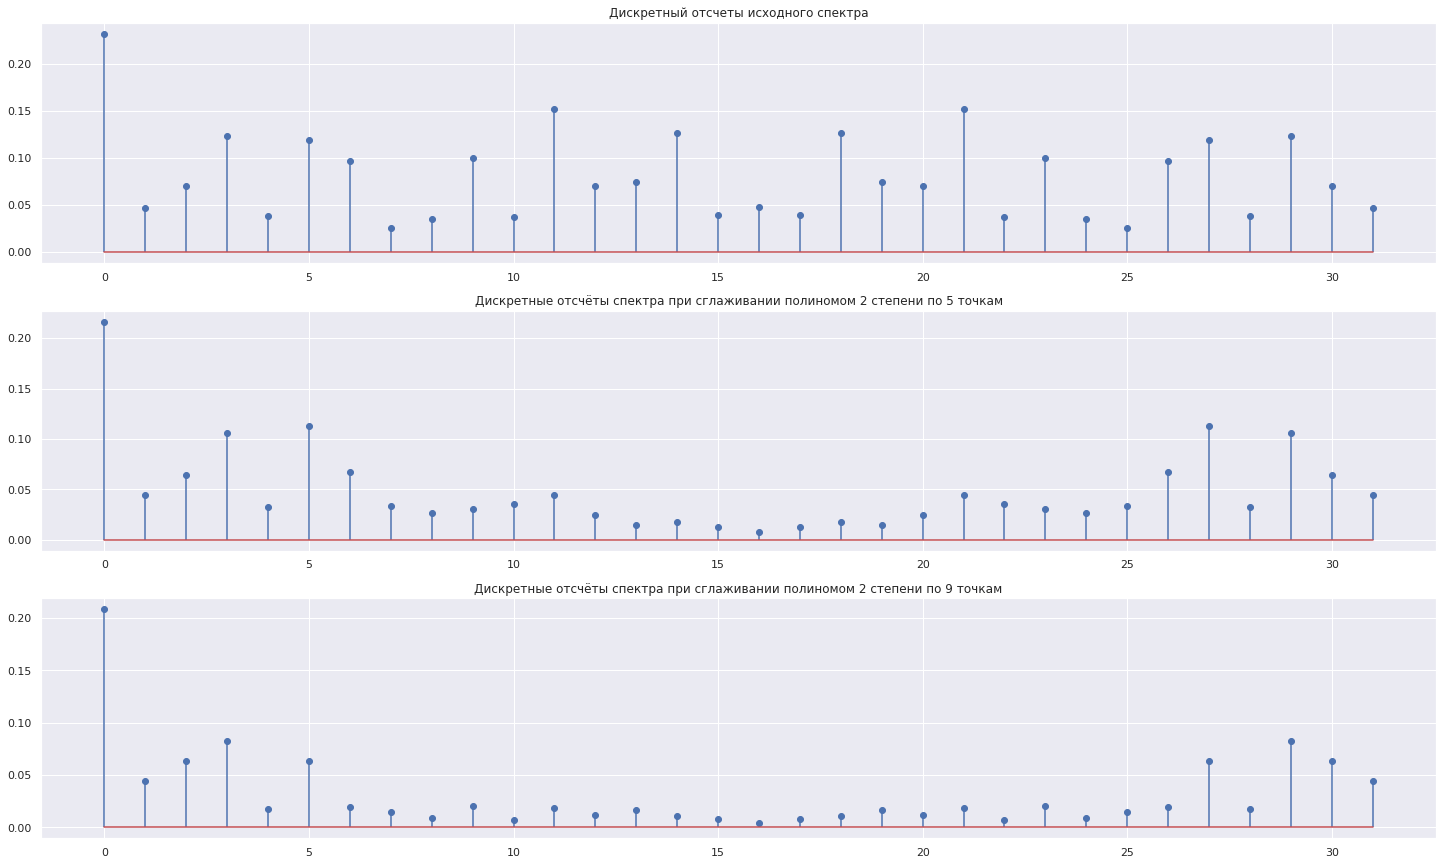

In [69]:
fig, axs = plt.subplots(3, figsize=(25,15))

axs[0].stem(specrt, use_line_collection=True)
axs[1].stem(specrt_pol2_5, use_line_collection=True)
axs[2].stem(specrt_pol2_9, use_line_collection=True)
axs[0].set_title('Дискретный отсчеты исходного спектра')
axs[1].set_title('Дискретные отсчёты спектра при сглаживании полиномом 2 степени по 5 точкам')
axs[2].set_title('Дискретные отсчёты спектра при сглаживании полиномом 2 степени по 9 точкам')
plt.show()

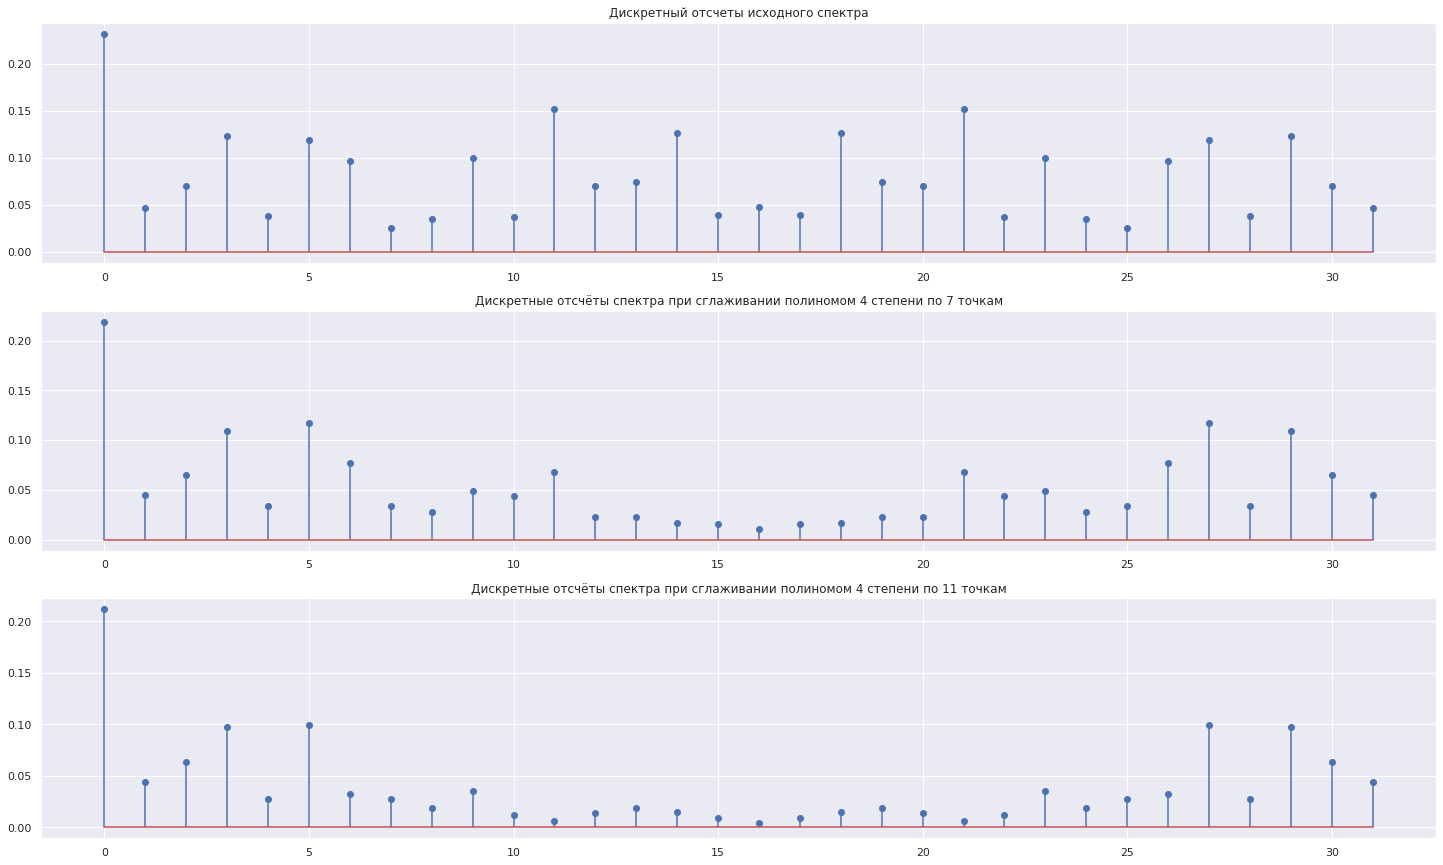

In [70]:
fig, axs = plt.subplots(3, figsize=(25,15))

axs[0].stem(specrt, use_line_collection=True)
axs[1].stem(specrt_pol4_7, use_line_collection=True)
axs[2].stem(specrt_pol4_11, use_line_collection=True)
axs[0].set_title('Дискретный отсчеты исходного спектра')
axs[1].set_title('Дискретные отсчёты спектра при сглаживании полиномом 4 степени по 7 точкам')
axs[2].set_title('Дискретные отсчёты спектра при сглаживании полиномом 4 степени по 11 точкам')
plt.show()

In [71]:
h5 = lambda x: 1/35 * (17 + 24*np.cos(2*np.pi*x) - 6*np.cos(4*np.pi*x))
h7 = lambda x: 1/21 * (7 + 12*np.cos(2*np.pi*x) + 6*np.cos(4*np.pi*x) - 4*np.cos(6*np.pi*x))
h9 = lambda x: 1/231 * (59 + 108*np.cos(2*np.pi*x) + 78*np.cos(4*np.pi*x) + 28*np.cos(6*np.pi*x) - 42*np.cos(8*np.pi*x))
h11 = lambda x: 1/429 * (89 + 168*np.cos(2*np.pi*x) + 138*np.cos(4*np.pi*x) + 88*np.cos(6*np.pi*x) + 18*np.cos(8*np.pi*x) - 72*np.cos(10*np.pi*x))

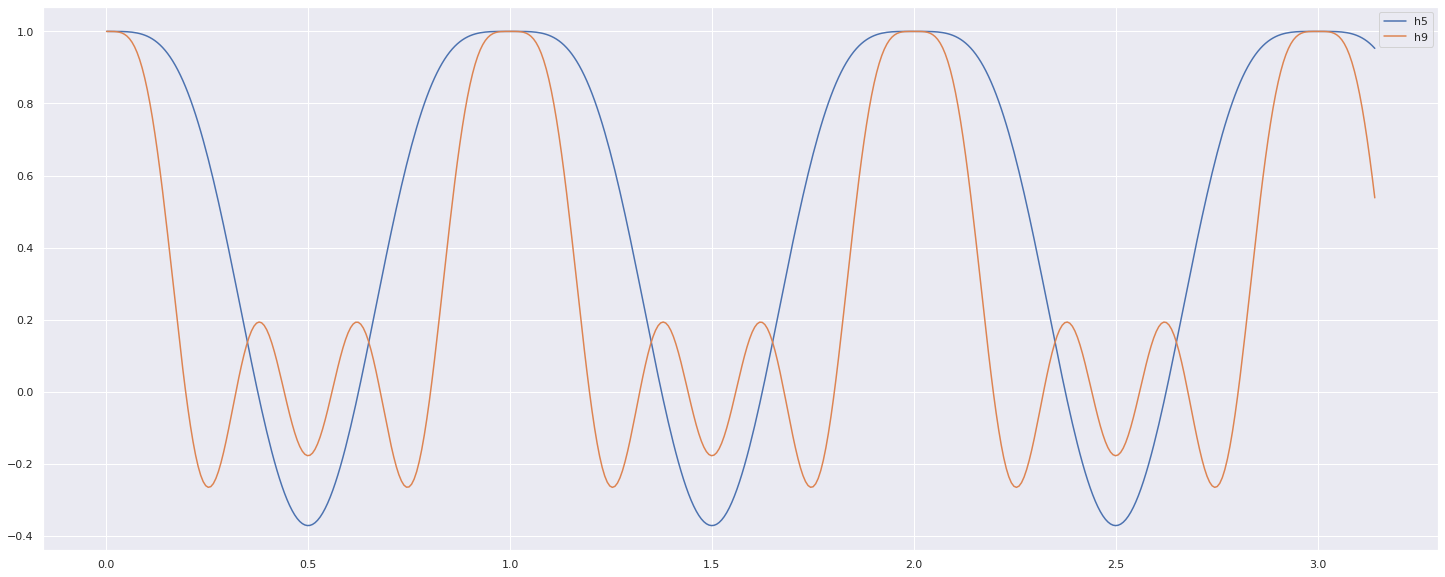

In [72]:
plt.figure(figsize=(25, 10))

plt.plot(t, h5(t), label="h5")
plt.plot(t, h9(t), label="h9")
plt.legend()

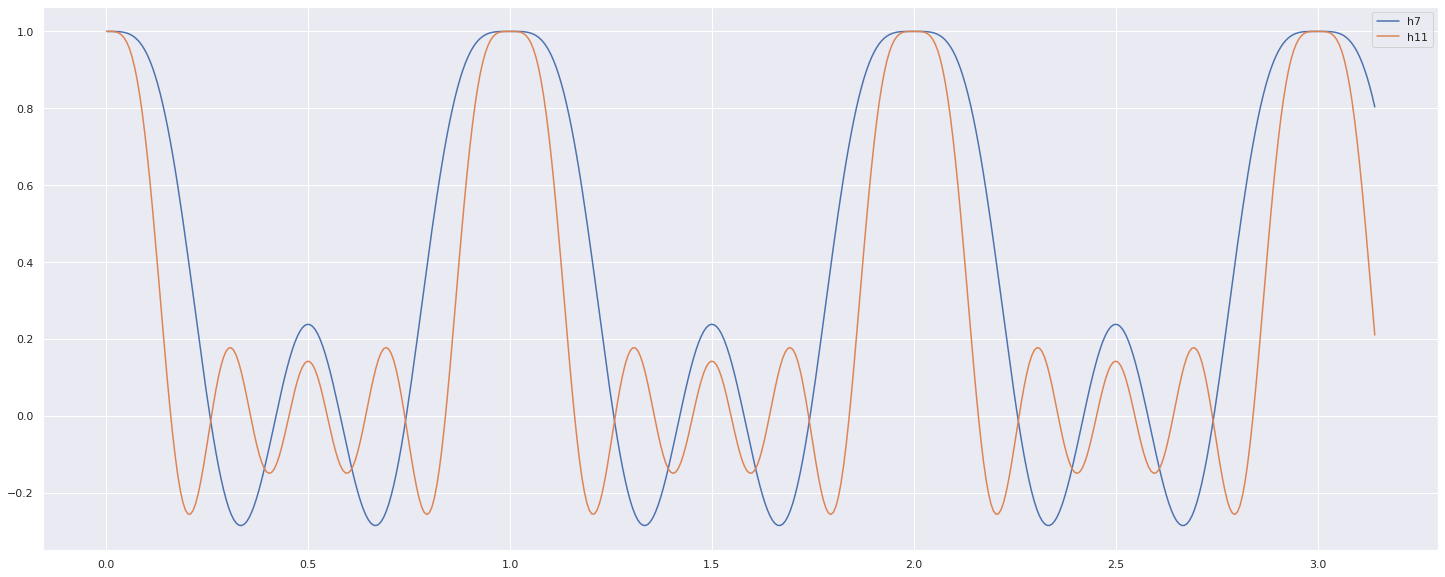

In [73]:
plt.figure(figsize=(25, 10))

plt.plot(t, h7(t), label="h7")
plt.plot(t, h11(t), label="h11")
plt.legend()

Исходя из графиков можно заметить, что амплитуда гармоник высоких частот снижена в спектре сглаженного сигнала. При сглаживании 11 точками дискретные скачки ослабляются.

## Выводы

В ходе выполнения лабораторной работы был проведен анализ различных сглаживаний дискретных функций, построены спектры дискретного сигнала. Были применены фильтры линейного сглаживания, сглаживание полиномами 2 и 4 степени. По спектру был сделан вывод, что обеспечивается фильтрация высоких частот.